Data Cleaning and Preparation

In [0]:
### Creating Dataframe for clinicaltrial_2023

df = spark.read.csv("/FileStore/tables/clinicaltrial_2023.csv", header=True)


In [0]:
### Cleaning Dataframe for clinicaltrial_2023

from pyspark.sql.functions import*

# Convert DataFrame to RDD and extract the first row

header = df.first()

# Add all column values into a new column named 'all_columns'

df = df.withColumn("all_columns", concat_ws(" ", *df.columns))

# Drop all other columns except the new column 'all_columns'

df = df.drop(*df.columns[:-1])

# Split the new column into multiple columns based on the delimiter

split_df = df.withColumn("split_columns", split(df["all_columns"], "\t"))

# Select each element of the split array as a separate column

df_ct2023 = split_df.selectExpr(
    "split_columns[0] as Id",
    "split_columns[1] as StudyTitle",
    "split_columns[2] as Acronym",
    "split_columns[3] as Status",
    "split_columns[4] as Conditions",
    "split_columns[5] as Interventions",
    "split_columns[6] as Sponsor",
    "split_columns[7] as Collaborators",
    "split_columns[8] as Enrollment",
    "split_columns[9] as FunderType",
    "split_columns[10] as Type",
    "split_columns[11] as StudyDesign",
    "split_columns[12] as Start",
    "split_columns[13] as Completion"
)


In [0]:
# Print first few rows of Dataframe for clinicaltrial_2023

df_ct2023.show(5, truncate=False)


+-----------+------------------------------------------------------------------------------------------------------------------------------------------------------------+----------+------------------+----------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------+---------------------------------------+------------------------------------------------------------------------------------+----------+----------+--------------+--------------------------------------------------------------------------------------------------------------------------------------------------+----------+----------+
|Id         |StudyTitle                                                                                                                                                  |Acronym   |Status            |Conditions                                                                              |In

In [0]:
### Cleaning and Creating Dataframe for clinicaltrial_2021, clinicaltrial_2020, pharma

df_ct2021 = spark.read.options(delimiter="|").csv("/FileStore/tables/clinicaltrial_2021.csv", header=True, inferSchema=True)
df_ct2020 = spark.read.options(delimiter="|").csv("/FileStore/tables/clinicaltrial_2020.csv", header=True, inferSchema=True)
df_pharma = spark.read.options(delimiter=",").csv("/FileStore/tables/pharma.csv", header=True, inferSchema=True)


In [0]:
# Print first few rows of Dataframe for clinicaltrial_2021

df_ct2021.show(5, truncate=False)

+-----------+--------------------------------------+----------------------+--------+----------+--------------------------------+----------+-------------------------------------------------+-------------+
|Id         |Sponsor                               |Status                |Start   |Completion|Type                            |Submission|Conditions                                       |Interventions|
+-----------+--------------------------------------+----------------------+--------+----------+--------------------------------+----------+-------------------------------------------------+-------------+
|NCT02758028|The University of Hong Kong           |Recruiting            |Aug 2005|Nov 2021  |Interventional                  |Apr 2016  |null                                             |null         |
|NCT02751957|Duke University                       |Completed             |Jul 2016|Jul 2020  |Interventional                  |Apr 2016  |Autistic Disorder,Autism Spectrum Disorder   

In [0]:
# Print first few rows of Dataframe for clinicaltrial_2020

df_ct2020.show(5, truncate=False)

+-----------+--------------------------------------+----------------------+--------+----------+--------------------------------+----------+-------------------------------------------------+-------------+
|Id         |Sponsor                               |Status                |Start   |Completion|Type                            |Submission|Conditions                                       |Interventions|
+-----------+--------------------------------------+----------------------+--------+----------+--------------------------------+----------+-------------------------------------------------+-------------+
|NCT02758028|The University of Hong Kong           |Recruiting            |Aug 2005|Nov 2021  |Interventional                  |Apr 2016  |null                                             |null         |
|NCT02751957|Duke University                       |Completed             |Jul 2016|Jul 2020  |Interventional                  |Apr 2016  |Autistic Disorder,Autism Spectrum Disorder   

In [0]:
# Print first few rows of Dataframe for pharma

df_pharma.show(5, truncate=False)

+-------------------------------------+-------------------+--------------+------------------------+---------------------------------------------------------+------------+------------+---------------------------------------+-----------------------------------------------------+------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------+-------------+-------------------

Q1: The Number of Distinct Studies in the Dataset

In [0]:
### The Number of Studies in clinicaltrial_2023

NumberOfStudies2023 = df_ct2023.select("Id").distinct().count()

# Print the Result

print("Number of Distinct Studies 2023:", NumberOfStudies2023)

Number of Distinct Studies 2023: 483422


In [0]:
### The Number of Studies in clinicaltrial_2021

NumberOfStudies2021 = df_ct2021.select("Id").distinct().count()

# Print the Result

print("Number of Distinct Studies 2021:", NumberOfStudies2021)

Number of Distinct Studies 2021: 387261


In [0]:
### The Number of Studies in clinicaltrial_2020

NumberOfStudies2020 = df_ct2020.select("Id").distinct().count()

# Print the Result

print("Number of Distinct Studies 2020:", NumberOfStudies2020)

Number of Distinct Studies 2020: 356466


Q2: List all Types of Studies in the dataset along with the frequencies of each type and ordered them from most frequent to least frequent

In [0]:
### Types of Studies for clinicaltrial_2023

# Filter out rows where "Type" column is not null or empty

df_filtered_2023 = df_ct2023.filter(col("Type").isNotNull() & (col("Type") != ""))

# Group by "Type" and count occurrences, then order by count in descending order

TypeCounts2023 = df_filtered_2023.groupBy("Type").count().orderBy("count", ascending=False)

TypeCounts2023.show(truncate = False)

+---------------+------+
|Type           |count |
+---------------+------+
|INTERVENTIONAL |371382|
|OBSERVATIONAL  |110221|
|EXPANDED_ACCESS|928   |
+---------------+------+



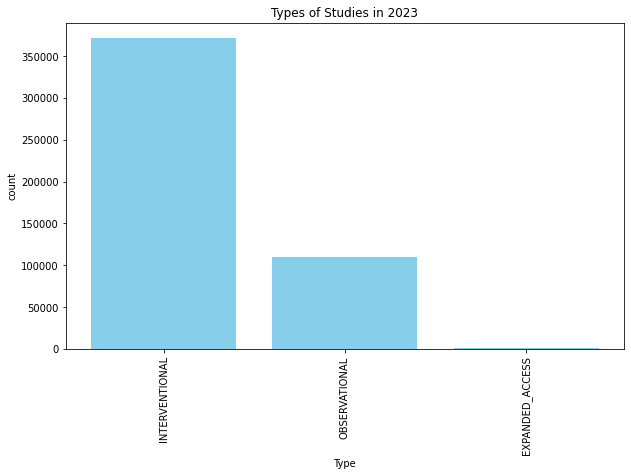

In [0]:
### Visualization of Types of Studies for clinicaltrial_2023

import pandas as pd
import matplotlib.pyplot as plt

# Convert Dataframe into Pandas DataFrame

df_filtered_2023 = df_ct2023.filter(col("Type").isNotNull() & (col("Type") != ""))
TypeCounts2023 = df_filtered_2023.groupBy("Type").count().orderBy("count", ascending=False)

df_2023 = TypeCounts2023.toPandas()

# Plotting the data

plt.figure(figsize=(10, 6))
plt.bar(df_2023['Type'], df_2023['count'], color='skyblue')
plt.title('Types of Studies in 2023')
plt.xlabel('Type')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()


In [0]:
### Types of Studies for clinicaltrial_2021

# Group by "Type" and count occurrences, then order by count in descending order

TypeCounts2021 = df_ct2021.groupBy("Type").count().orderBy("count", ascending=False)

TypeCounts2021.show(truncate = False)

+--------------------------------+------+
|Type                            |count |
+--------------------------------+------+
|Interventional                  |301472|
|Observational                   |77540 |
|Observational [Patient Registry]|8180  |
|Expanded Access                 |69    |
+--------------------------------+------+



In [0]:
### Types of Studies for clinicaltrial_2020

# Group by "Type" and count occurrences, then order by count in descending order

TypeCounts2020 = df_ct2020.groupBy("Type").count().orderBy("count", ascending=False)

TypeCounts2020.show(truncate = False)

+--------------------------------+------+
|Type                            |count |
+--------------------------------+------+
|Interventional                  |277631|
|Observational                   |71434 |
|Observational [Patient Registry]|7332  |
|Expanded Access                 |69    |
+--------------------------------+------+



Q3: Top 5 Conditions with their Frequencies

In [0]:
### Top 5 Conditions for clinicaltrial_2023

from pyspark.sql.functions import col

# Filter out rows where "Conditions" column is not null or empty

filtered_df2023 = df_ct2023.filter(col("Conditions").isNotNull() & (col("Conditions") != ""))

# Split the "Conditions" column by the delimiter "|" and explode the resulting array

split_df2023 = filtered_df2023.withColumn("Condition", split("Conditions", "\\|"))
exploded_df2023 = split_df2023.selectExpr("Id", "explode(Condition) as Condition")

# Group by "Conditions" and count occurrences, then order by count in descending order

condition_counts_2023 =exploded_df2023.groupBy("Condition").count().orderBy("count", ascending=False)

# Take the top 5 conditions

Top5_Conditions2023 = condition_counts_2023.limit(5)

# Show the result

Top5_Conditions2023.show(truncate=False)


+-------------+-----+
|Condition    |count|
+-------------+-----+
|Healthy      |9731 |
|Breast Cancer|7502 |
|Obesity      |6549 |
|Stroke       |4071 |
|Hypertension |4020 |
+-------------+-----+



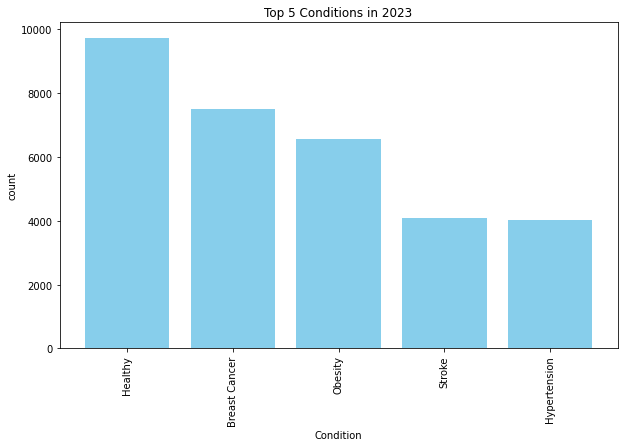

In [0]:
### Visualization of Top 5 Conditions for clinicaltrial_2023

import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# Convert Dataframe into Pandas DataFrame

filtered_df2023 = df_ct2023.filter(col("Conditions").isNotNull() & (col("Conditions") != ""))
split_df2023 = filtered_df2023.withColumn("Condition", split("Conditions", "\\|"))
exploded_df2023 = split_df2023.selectExpr("Id", "explode(Condition) as Condition")
condition_counts_2023 =exploded_df2023.groupBy("Condition").count().orderBy("count", ascending=False)
Top5_Conditions2023 = condition_counts_2023.limit(5)

df_2023 = Top5_Conditions2023.toPandas()

# Plotting the data

plt.figure(figsize=(10, 6))
plt.bar(df_2023['Condition'], df_2023['count'], color='skyblue')
plt.title('Top 5 Conditions in 2023')
plt.xlabel('Condition')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()


In [0]:
### Top 5 Conditions for clinicaltrial_2021

# Filter out rows where "Conditions" column is not null or empty

filtered_df2021 = df_ct2021.filter(col("Conditions").isNotNull()& (col("Conditions") != ""))

# Split the "Conditions" column by the delimiter "|" and explode the resulting array

split_df2021 = filtered_df2021.withColumn("Condition", split("Conditions", ","))
exploded_df2021 = split_df2021.selectExpr("Id", "explode(Condition) as Condition")

# Group by "Conditions" and count occurrences, then order by count in descending order

condition_counts_2021 = exploded_df2021.groupBy("Condition").count().orderBy("count", ascending=False)

# Take the top 5 conditions

Top5_Conditions2021 = condition_counts_2021.limit(5)

# Show the result

Top5_Conditions2021.show(truncate=False)


+-----------------+-----+
|Condition        |count|
+-----------------+-----+
|Carcinoma        |13389|
|Diabetes Mellitus|11080|
|Neoplasms        |9371 |
|Breast Neoplasms |8640 |
|Syndrome         |8032 |
+-----------------+-----+



In [0]:
### Top 5 Conditions for clinicaltrial_2020

# Filter out rows where "Conditions" column is not null or empty

filtered_df2020 = df_ct2020.filter(col("Conditions").isNotNull()& (col("Conditions") != ""))

# Split the "Conditions" column by the delimiter "|" and explode the resulting array

split_df2020 = filtered_df2020.withColumn("Condition", split("Conditions", ","))
exploded_df2020 = split_df2020.selectExpr("Id", "explode(Condition) as Condition")

# Group by "Conditions" and count occurrences, then order by count in descending order

condition_counts_2020 = exploded_df2020.groupBy("Condition").count().orderBy("count", ascending=False)

# Take the top 5 conditions

Top5_Conditions2020 = condition_counts_2020.limit(5)

# Show the result

Top5_Conditions2020.show(truncate=False)

+-----------------+-----+
|Condition        |count|
+-----------------+-----+
|Carcinoma        |12245|
|Diabetes Mellitus|10425|
|Neoplasms        |8534 |
|Breast Neoplasms |8009 |
|Syndrome         |7419 |
+-----------------+-----+



Q4: Ten Most Common Sponsors that are not Pharmaceutical Companies, along with the Number of Clinical Trials they have Sponsored

In [0]:
### Ten Most Common Sponsors that are not Pharmaceutical Companies for clinicaltrial_2023

# Create a list of pharmaceutical companies from the pharma Dataframe

PharmaCompanies_List = df_pharma.select("Parent_Company").distinct().rdd.flatMap(lambda x: x).collect()

# Count sponsors that are not in the pharmaceutical companies list

NonPharmaSponsor_Count2023 = df_ct2023.filter(~col("Sponsor").isin(PharmaCompanies_List))\
                            .groupBy("Sponsor").count().orderBy(desc("count")).limit(10)

# Show the Result

NonPharmaSponsor_Count2023.show(truncate=False)


+-------------------------------------------------------------+-----+
|Sponsor                                                      |count|
+-------------------------------------------------------------+-----+
|National Cancer Institute (NCI)                              |3410 |
|Assiut University                                            |3335 |
|Cairo University                                             |3023 |
|Assistance Publique - Hôpitaux de Paris                      |2951 |
|Mayo Clinic                                                  |2766 |
|M.D. Anderson Cancer Center                                  |2702 |
|Novartis Pharmaceuticals                                     |2393 |
|National Institute of Allergy and Infectious Diseases (NIAID)|2340 |
|Massachusetts General Hospital                               |2263 |
|National Taiwan University Hospital                          |2181 |
+-------------------------------------------------------------+-----+



In [0]:
### Ten Most Common Sponsors that are not Pharmaceutical Companies for clinicaltrial_2021

# Create a list of pharmaceutical companies from the pharma Dataframe

PharmaCompanies_List = df_pharma.select("Parent_Company").distinct().rdd.flatMap(lambda x: x).collect()

# Count sponsors that are not in the pharmaceutical companies list

NonPharmaSponsor_Count2021 = df_ct2021.filter(~col("Sponsor").isin(PharmaCompanies_List))\
                            .groupBy("Sponsor").count().orderBy(desc("count")).limit(10)

# Show the Result

NonPharmaSponsor_Count2021.show(truncate=False)


+---------------------------------------+-----+
|Sponsor                                |count|
+---------------------------------------+-----+
|National Cancer Institute (NCI)        |3218 |
|M.D. Anderson Cancer Center            |2414 |
|Assistance Publique - Hôpitaux de Paris|2369 |
|Mayo Clinic                            |2300 |
|Merck Sharp & Dohme Corp.              |2243 |
|Assiut University                      |2154 |
|Novartis Pharmaceuticals               |2088 |
|Massachusetts General Hospital         |1971 |
|Cairo University                       |1928 |
|Hoffmann-La Roche                      |1828 |
+---------------------------------------+-----+



In [0]:
### Ten Most Common Sponsors that are not Pharmaceutical Companies for clinicaltrial_2020

# Create a list of pharmaceutical companies from the pharma Dataframe

PharmaCompanies_List = df_pharma.select("Parent_Company").distinct().rdd.flatMap(lambda x: x).collect()

# Count sponsors that are not in the pharmaceutical companies list

NonPharmaSponsor_Count2020 = df_ct2020.filter(~col("Sponsor").isin(PharmaCompanies_List))\
                            .groupBy("Sponsor").count().orderBy(desc("count")).limit(10)

# Show the Result

NonPharmaSponsor_Count2020.show(truncate=False)


+---------------------------------------+-----+
|Sponsor                                |count|
+---------------------------------------+-----+
|National Cancer Institute (NCI)        |3100 |
|M.D. Anderson Cancer Center            |2238 |
|Merck Sharp & Dohme Corp.              |2184 |
|Mayo Clinic                            |2097 |
|Assistance Publique - Hôpitaux de Paris|2043 |
|Novartis Pharmaceuticals               |1962 |
|Massachusetts General Hospital         |1823 |
|Assiut University                      |1806 |
|Hoffmann-La Roche                      |1761 |
|National Taiwan University Hospital    |1720 |
+---------------------------------------+-----+



Q5: Plot Number of Completed Studies for Each Month and Carete a Table of all Values

| Month | Count |
+-------+-------+
| Jan  |  1494 |
| Feb  |  1272 |
| Mar  |  1552 |
| Apr  |  1324 |
| May  |  1415 |
| Jun  |  1619 |
| Jul  |  1360 |
| Aug  |  1230 |
| Sep  |  1152 |
| Oct  |  1058 |
| Nov  |  909 |
| Dec  |  1082 |


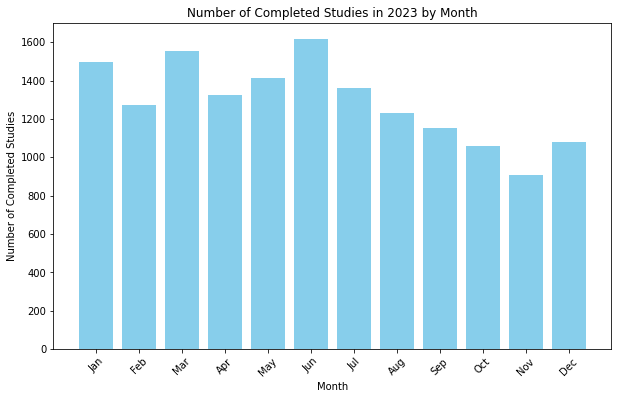

In [0]:
### Table Creation for Number of Completed Studies for Each Month in 2023 for clinicaltrial_2023

from pyspark.sql.functions import year, month, date_format, count, regexp_replace, trim, col
from pyspark.sql.types import IntegerType
from pyspark.sql import functions as F
import calendar

# Remove extra commas from Completion Date

df_ct2023 = df_ct2023.withColumn("Completion", trim(regexp_replace(df_ct2023["Completion"], '"', "")))

# Filter the Dataframe for completed studies in 2023

completed_studies_2023 = df_ct2023.filter((year(df_ct2023["Completion"]) == 2023) & (df_ct2023["Status"] == "COMPLETED"))

# Convert the Completion column to the proper date format

completed_studies_2023 = completed_studies_2023.withColumn("Completion", date_format("Completion", "yyyy-MM-dd"))

# Extract the Months from the Completion column

completed_studies_2023 = completed_studies_2023.withColumn("Month", month("Completion"))

#  Count the number of completed studies for each month

monthly_counts = (
    completed_studies_2023
    .groupBy("Month")
    .count()
    .orderBy("Month")
    .collect()
)

# Define a dictionary to map month numbers to month names

month_names_dict = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}

# Map month numbers to month names

month_names = [month_names_dict[row["Month"]] for row in monthly_counts]

# Display the table

print("| Month | Count |")
print("+-------+-------+")
for i, row in enumerate(monthly_counts):
    print(f"| {month_names[i]}  |  {row['count']} |")


### Plot Number of Completed Studies for Each Month in 2023 for clinicaltrial_2023

import matplotlib.pyplot as plt

# Plotting the data

plt.figure(figsize=(10, 6))
plt.bar(month_names, [row["count"] for row in monthly_counts], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Completed Studies')
plt.title('Number of Completed Studies in 2023 by Month')
plt.xticks(rotation=45)
plt.show()


| Month | Count |
+-------+-------+
| Jan  |  1131 |
| Feb  |  934 |
| Mar  |  1227 |
| Apr  |  967 |
| May  |  984 |
| Jun  |  1094 |
| Jul  |  819 |
| Aug  |  700 |
| Sep  |  528 |
| Oct  |  187 |


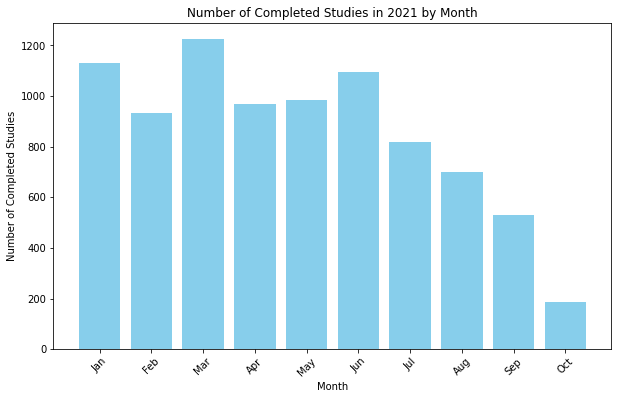

In [0]:
### Table Creation for Number of Completed Studies for Each Month in 2021 for clinicaltrial_2021

from pyspark.sql.functions import month
from datetime import datetime

# Convert the Completion column to proper date format

df_ct2021 = df_ct2021.withColumn("Completion", to_date(df_ct2021["Completion"], "MMM yyyy"))

# Filter the DataFrame for completed studies in 2021

completed_studies_2021 = df_ct2021.filter((year(df_ct2021["Completion"]) == 2021) & (df_ct2021["Status"] == "Completed"))

# Count the number of completed studies for each month

monthly_counts = (
    completed_studies_2021
    .groupBy(month("Completion").alias("Month"))
    .count()
    .orderBy("Month")
    .collect()
)

# Convert month numbers to month names

month_names = [datetime.strptime(str(row["Month"]), "%m").strftime("%b") for row in monthly_counts]

# Display the table

print("| Month | Count |")
print("+-------+-------+")
for i, row in enumerate(monthly_counts):
    print(f"| {month_names[i]}  |  {row['count']} |")


### Plot Number of Completed Studies for Each Month in 2021 for clinicaltrial_2021

import matplotlib.pyplot as plt

# Plotting the data

plt.figure(figsize=(10, 6))
plt.bar(month_names, [row["count"] for row in monthly_counts], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Completed Studies')
plt.title('Number of Completed Studies in 2021 by Month')
plt.xticks(rotation=45)
plt.show()


| Month | Count |
+-------+-------+
| Jan  |  1544 |
| Feb  |  1286 |
| Mar  |  1740 |
| Apr  |  1080 |
| May  |  1176 |
| Jun  |  1424 |
| Jul  |  1237 |
| Aug  |  1126 |
| Sep  |  1167 |
| Oct  |  1176 |
| Nov  |  1078 |
| Dec  |  2084 |


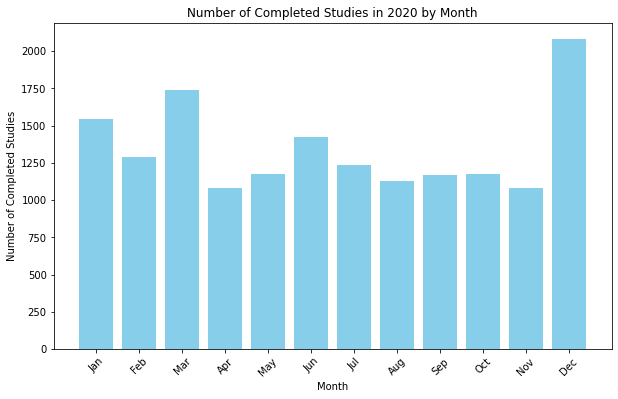

In [0]:
### Table Creation for Number of Completed Studies for Each Month in 2020 for clinicaltrial_2020

from pyspark.sql.functions import month
from datetime import datetime

# Convert the Completion column to proper date format

df_ct2020 = df_ct2020.withColumn("Completion", to_date(df_ct2020["Completion"], "MMM yyyy"))

# Filter the DataFrame for completed studies in 2020

completed_studies_2020 = df_ct2020.filter((year(df_ct2020["Completion"]) == 2020) & (df_ct2020["Status"] == "Completed"))

# Count the number of completed studies for each month

monthly_counts = (
    completed_studies_2020
    .groupBy(month("Completion").alias("Month"))
    .count()
    .orderBy("Month")
    .collect()
)

# Convert month numbers to month names

month_names = [datetime.strptime(str(row["Month"]), "%m").strftime("%b") for row in monthly_counts]

# Display the table

print("| Month | Count |")
print("+-------+-------+")
for i, row in enumerate(monthly_counts):
    print(f"| {month_names[i]}  |  {row['count']} |")


### Plot Number of Completed Studies for Each Month in 2020 for clinicaltrial_2020

import matplotlib.pyplot as plt

# Plotting the data

plt.figure(figsize=(10, 6))
plt.bar(month_names, [row["count"] for row in monthly_counts], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Completed Studies')
plt.title('Number of Completed Studies in 2020 by Month')
plt.xticks(rotation=45)
plt.show()


Additional Analysis 2: Total Penalty Amount imposed for each Offense Group within the pharmaceutical industry, considering only Penalties imposed at the Federal Level

In [0]:
### Total Penalty Amount imposed for each Offense Group within the pharmaceutical industry, considering only Penalties imposed at the Federal Level

from pyspark.sql.functions import *

# Filter Penalty_Amount column from pharma dataframe for any Null Values

df_pharma = df_pharma.filter(df_pharma.Penalty_Amount.isNotNull())

# Remove $ sign from Penalty_Amount

df_pharma = df_pharma.withColumn("Penalty_Amount", regexp_replace(col("Penalty_Amount"), "[$,]", "").cast("integer"))

# Filter Penalties imposed at the Federal Level

federal_penalties_df = df_pharma.filter(df_pharma["Level_of_Government"] == "federal")

# Group by Offense_Group and Calculate the Sum of Penalty_Amount

offense_group_df = federal_penalties_df.groupBy("Offense_Group").agg(sum("Penalty_Amount").alias("Total_Penalty_Amount"))

# Sort offense_group_df by Total Penalty Amount in descending order

sorted_offense_group_df = offense_group_df.orderBy(offense_group_df["Total_Penalty_Amount"].desc())

# Show the Result

sorted_offense_group_df.show(truncate=False)


+---------------------------------------+--------------------+
|Offense_Group                          |Total_Penalty_Amount|
+---------------------------------------+--------------------+
|healthcare-related offenses            |10975869358         |
|government-contracting-related offenses|10090648089         |
|competition-related offenses           |2756374875          |
|safety-related offenses                |2092612778          |
|consumer-protection-related offenses   |1302100000          |
|employment-related offenses            |480057650           |
|financial offenses                     |309143226           |
|environment-related offenses           |62945230            |
|miscellaneous offenses                 |9000                |
+---------------------------------------+--------------------+



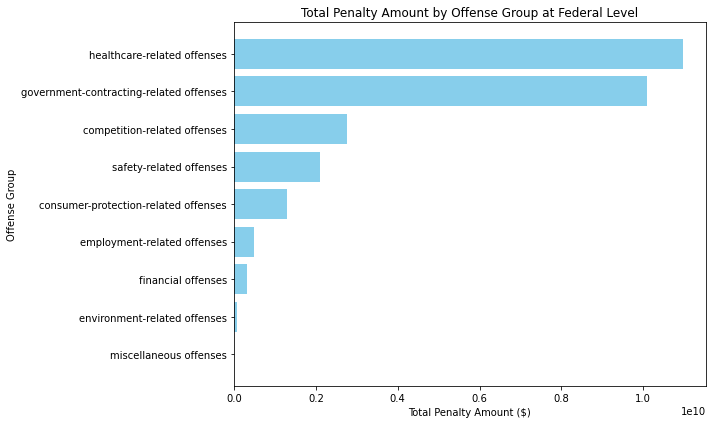

In [0]:
### Visualization for Total Penalty Amount imposed for each Offense Group at the Federal Level

import matplotlib.pyplot as plt

# Extract Offense Groups and Total Penalty Amounts from the DataFrame

offense_groups = sorted_offense_group_df.select("Offense_Group").rdd.flatMap(lambda x: x).collect()
total_penalty_amounts = sorted_offense_group_df.select("Total_Penalty_Amount").rdd.flatMap(lambda x: x).collect()

# Plotting the Data

plt.figure(figsize=(10, 6))
plt.barh(offense_groups, total_penalty_amounts, color='skyblue')
plt.xlabel('Total Penalty Amount ($)')
plt.ylabel('Offense Group')
plt.title('Total Penalty Amount by Offense Group at Federal Level')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
